Problem statement -
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.

In [4]:

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [6]:
import os
os.chdir(r'C:/Users/PRASHANT/Desktop/Edwisor project 1')
print(os.getcwd())

C:\Users\PRASHANT\Desktop\Edwisor project 1


In [7]:
df= pd.read_csv('Bikerent.csv')

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##as it is already mentioned in our problem statement that "cnt" variable includes both casual and registered, it is basically a summation of both so we will drop casual and registered variable for our further steps.

In [12]:
df1 = df.drop(['casual', 'registered'], axis = 1)

In [15]:
df1.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600



# checking for missing values analysis

In [16]:
print(df1.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [17]:
# we are divinding the Variables under " Continuous " and "Categorical"
cont= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

cat = ['instant','season','yr','mnth',
                     'holiday','weekday', 'workingday', 'weathersit']

In [19]:
df1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [20]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


# Outier Analysis

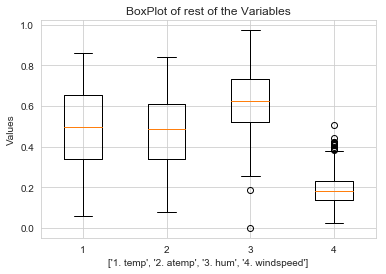

In [30]:
plt.boxplot([ df1['temp'], df1['atemp'], df1['hum'], df1['windspeed']])
plt.xlabel(['1. temp', '2. atemp', '3. hum', '4. windspeed'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')
plt.savefig('Boxplot for other variables')

{'whiskers': [<matplotlib.lines.Line2D at 0x17e346de080>,
 'caps': [<matplotlib.lines.Line2D at 0x17e346de780>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e346c2eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x17e346dee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e345da240>],
 'means': []}

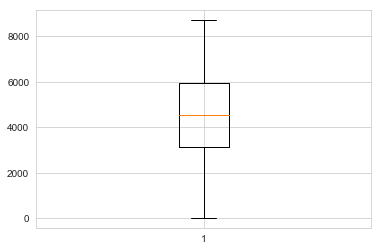

In [31]:
plt.boxplot(df1['cnt'])

As we can see in our windspeed variable there are some outlier figures presented. so we need to treat those outliers.

In [33]:
# Getting 75 and 25 percentile of variable "windspeed"
q75, q25 = np.percentile(df1['windspeed'], [75,25])
# Calculating Interquartile range
iqr = q75 - q25
    
# Calculating upper extream and lower extream
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)
    
# Replacing all the outliers value to NA
df1.loc[df1['windspeed']< minimum,'windspeed'] = np.nan
df1.loc[df1['windspeed']> maximum,'windspeed'] = np.nan

# Checking % of missing values
df1.isnull().sum().sum()

13

In [35]:
#Checking missing values in train dataset
print(df1.isnull().sum()) 

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed     13
cnt            0
dtype: int64


In [ ]:
#Since the % of null values (previously outliers) for 'Windspeed' variable is 1.778 
#which is very less, we can delete the rows with missing 'Windspeed'

In [37]:
df1 = df1.drop(df1[df1['windspeed'].isnull()].index, axis =0)
print(df1.shape)
print(df1['windspeed'].isnull().sum())

(718, 14)
0


{'whiskers': [<matplotlib.lines.Line2D at 0x17e340cf4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x17e340cfba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e340cf320>],
 'medians': [<matplotlib.lines.Line2D at 0x17e346062e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e34606668>],
 'means': []}

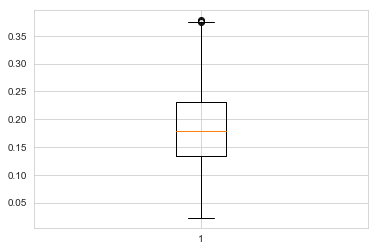

In [39]:
##check for outlier post treatment
plt.boxplot(df1['windspeed'])

# feature selection using  correlation and multiple correlation

[]

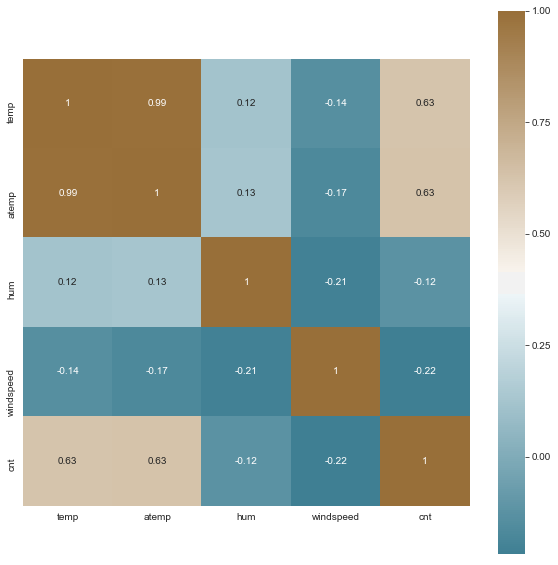

In [40]:
##Correlation analysis for continuous variables
#Correlation plot
df1_corr = df1.loc[:,cont]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df1_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

Need to do anova testing for categorical variables

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [42]:
#loop for ANOVA test Since the target variable is continuous
##Anova test for categorical predictor and numeric target variable-

label = 'cnt'
for  i in cat:
    frame = label + ' ~ ' + i
    model = ols(frame,data=df1).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)   

                sum_sq     df           F        PR(>F)
instant   1.082436e+09    1.0  481.483594  5.124320e-82
Residual  1.609658e+09  716.0         NaN           NaN
                sum_sq     df           F        PR(>F)
season    4.339182e+08    1.0  137.582525  3.471744e-29
Residual  2.258175e+09  716.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.887593e+08    1.0  352.875098  2.610818e-64
Residual  1.803334e+09  716.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.075578e+08    1.0  59.814566  3.542982e-14
Residual  2.484536e+09  716.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.358307e+07    1.0  3.630929  0.057115
Residual  2.678510e+09  716.0       NaN       NaN
                sum_sq     df        F    PR(>F)
weekday   1.326585e+07    1.0  3.54571  0.060105
Residual  2.678828e+09  716.0      NaN       NaN
                  sum_sq     df   

Here we have noticed that in the correlation plot two variables are highly correlated which is 'temp' and 'atemp'
and in the anove testing 'holiday' , 'weekday', 'workingday' are not independent of each other
#H0 - all the variables are independent of each other
#H1 - all the variables are not indpendent of each other.

so we will drop above mentioned variables


In [44]:
drop_it = ['temp', 'holiday', 'weekday','workingday']
df1= df1.drop(drop_it, axis = 1)

In [47]:
##update  cont and cat

cont = [i for i in cont if i not in drop_it]
cat = [i for i in cat if i not in drop_it]

# Feature Scaling

atemp


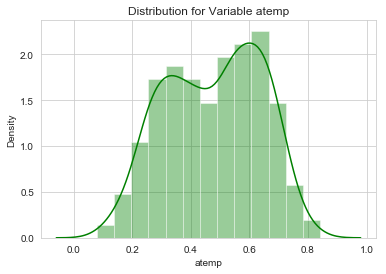

hum


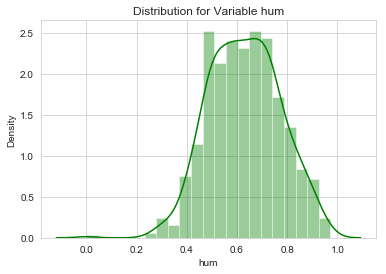

windspeed


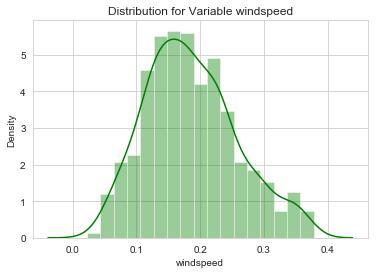

cnt


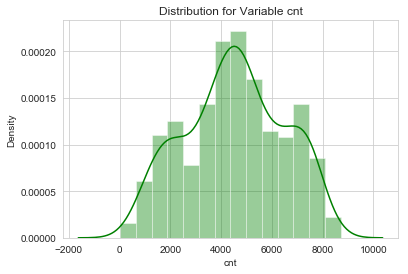

In [49]:
for i in cont:
    print(i)
    sns.distplot(df1[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [50]:
# Since our data is normally distributed, but still to bring every variable on common standard 
##we will use Normalization for Feature Scalling except the target variable
# #Normalization
for i in cont:
    if i == 'cnt':
        continue
    df1[i] = (df1[i] - df1[i].min())/(df1[i].max()-df1[i].min())

atemp


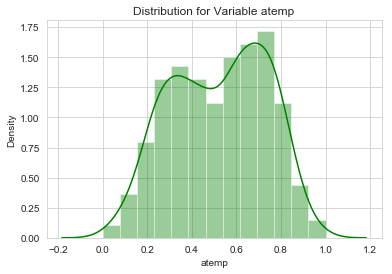

hum


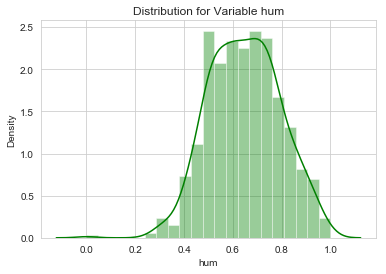

windspeed


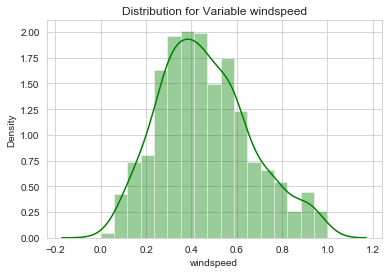

cnt


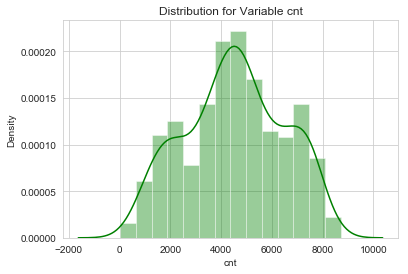

In [52]:
for i in cont:
    print(i)
    sns.distplot(df1[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()


# Creating Dummy Variables

In [53]:
#### before going for algorithms we will use dummy variables analysis for categorical variables

dummy_df1 = pd.get_dummies(data = df1, columns = cat)


In [65]:
df1.head()

,instant,dteday,season,yr,mnth,weathersit,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,2,0.373517,0.828620,0.388102,985
1,2,1/2/2011,1,0,1,2,0.360541,0.715771,0.635752,801
2,3,1/3/2011,1,0,1,1,0.144830,0.449638,0.635105,1349
3,4,1/4/2011,1,0,1,1,0.174649,0.607131,0.387681,1562
4,5,1/5/2011,1,0,1,1,0.197158,0.449313,0.462471,1600


In [60]:
cat

['instant', 'season', 'yr', 'mnth', 'weathersit']

In [61]:
df1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
weathersit      int64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [64]:
##changing Data types

##Create a list of variables which are incorrectly classified as numeric
convert_obj = ['season',
 'yr',
 'mnth',
 'weathersit']
for i in convert_obj:
    df1.loc[:,i] = df1.loc[:,i].astype('object')

df1.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
weathersit     object
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [66]:
##change the data type as requried
df1['dteday'] = pd.to_datetime(df1['dteday'], errors= 'coerce')
df1.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
weathersit            object
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [67]:
df1.head()

,instant,dteday,season,yr,mnth,weathersit,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,2,0.373517,0.828620,0.388102,985
1,2,2011-01-02,1,0,1,2,0.360541,0.715771,0.635752,801
2,3,2011-01-03,1,0,1,1,0.144830,0.449638,0.635105,1349
3,4,2011-01-04,1,0,1,1,0.174649,0.607131,0.387681,1562
4,5,2011-01-05,1,0,1,1,0.197158,0.449313,0.462471,1600


In [69]:
##as we know that instant and dteday is not showing any logical impact so we should drop these two variables also

drop_it1 = ['instant', 'dteday']
df1= df1.drop(drop_it1, axis = 1)


In [72]:
##update  cont and cat

cont = [i for i in cont if i not in drop_it1]
cat = [i for i in cat if i not in drop_it1]

In [77]:
df1.nunique()

season          4
yr              2
mnth           12
weathersit      3
atemp         680
hum           587
windspeed     637
cnt           685
dtype: int64

# Creating dummy variables

In [79]:
#### before going for algorithms we will use dummy variables analysis for categorical variables

dummy_df1 = pd.get_dummies(data = df1, columns = cat)

In [82]:
dummy_df1.shape

(718, 25)

In [84]:
dummy_df1.head()

,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.373517,0.828620,0.388102,985,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.360541,0.715771,0.635752,801,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.144830,0.449638,0.635105,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.174649,0.607131,0.387681,1562,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.197158,0.449313,0.462471,1600,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Machine Learning algorithems

###train test split

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [88]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( dummy_df1.iloc[:, dummy_df1.columns != 'cnt'], 
                         dummy_df1.iloc[:, 3], test_size = 0.20, random_state = 1)

In [89]:
#checking the shape of the train and test 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(574, 24) (574,)
(144, 24) (144,)


###Linear regression model

In [96]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

In [97]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [98]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [99]:
##calculating RMSE for train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [100]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 748.0128017406815
Root Mean Squared Error For Test data = 901.6852393342887


In [101]:
#calculate R^2 for train data
r2_score(y_train, pred_train_LR)


0.845245138638133

In [102]:
#calculate R^2 for test data

r2_score(y_test, pred_test_LR)

0.810161927005014

In [103]:
#Linear Regression model for regression-
LR_model= sm.OLS(y_test,X_test).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     30.30
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.00e-38
Time:                        12:23:45   Log-Likelihood:                -1175.6
No. Observations:                 144   AIC:                             2393.
Df Residuals:                     123   BIC:                             2456.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atemp         4588.1305    942.856      4.866   

###Decsion Tree

In [90]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [91]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [92]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [93]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 1030.2928796742729
Root Mean Squared Error For Test data = 1282.4613468501855


In [94]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7064056888207673

In [95]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.6159728183399968

##random forest model

In [104]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [105]:
#here we have chose n_estimators = 200, we will further try to evaluate the performance of the model by tuning
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [106]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [107]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [108]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 259.9264030257324
Root Mean Squared Error For Test data = 812.026249578066


In [109]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

0.9813135401056612

In [110]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8460380038515609

###gradient boosting model

In [112]:
# Importing library for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [114]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [115]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))


In [116]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 437.9280086306251
Root Mean Squared Error For Test data = 751.108268821793


In [119]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.9469565596823101

In [120]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8682718834344123

# Principle component analysis

In [121]:
target = dummy_df1['cnt']

In [123]:
X = dummy_df1.drop(['cnt'],axis=1)

In [124]:
from sklearn.decomposition import PCA

In [125]:
#scaled_data = preprocessing.scale(X)
X1= X.values
pca = PCA()
pca.fit(X1)
pca_data = pca.transform(X1)

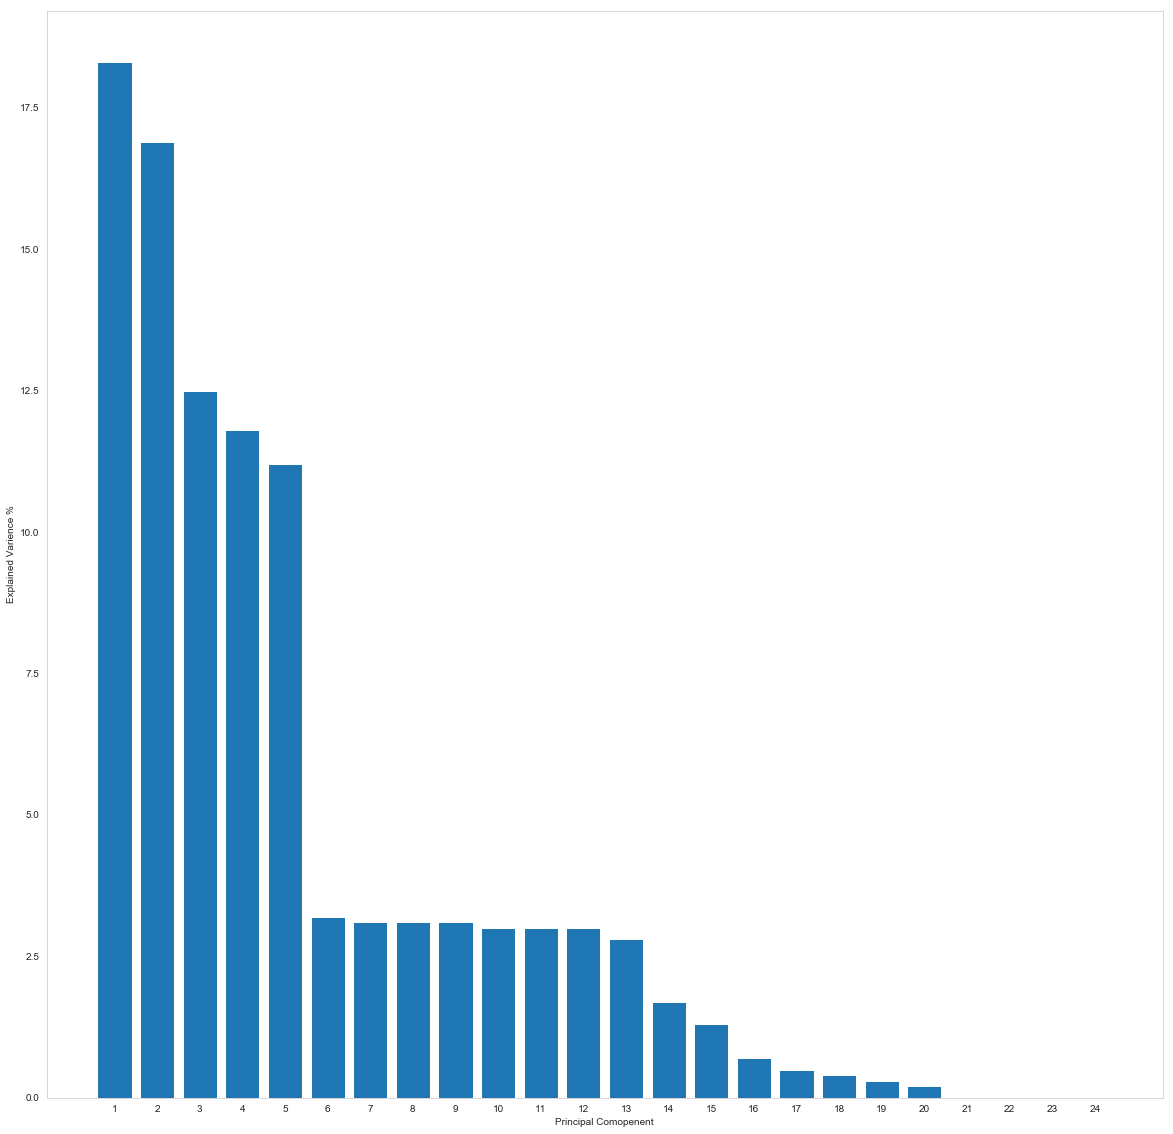

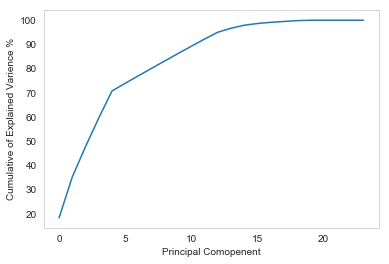

In [126]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
lables = [ str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,20))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=lables)
plt.grid()
plt.ylabel('Explained Varience %')
plt.xlabel('Principal Comopenent')
plt.savefig('PCA1.pdf')
plt.show()

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)
plt.grid()
plt.ylabel('Cumulative of Explained Varience %')
plt.xlabel('Principal Comopenent')
plt.savefig('PCA2.pdf')
plt.show()

In [127]:
# From the above plot selecting 15 components since it explains almost 95+ % data variance
pca = PCA(n_components=15)
# Fitting the selected components to the data
pca.fit(X)
pca_data = pca.fit_transform(X)
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data, target, test_size = 0.20, random_state = 1)

In [128]:
X_train.shape

(574, 15)

####checking Linear regressioin post applying PCA

In [129]:
fit_LR_pca = LinearRegression().fit(X_train , y_train)

In [130]:
#prediction on train data
pred_train_LR_pca = fit_LR_pca.predict(X_train)

In [132]:
#prediction on test data
pred_test_LR_pca = fit_LR_pca.predict(X_test)

In [134]:
##calculating RMSE for train data
RMSE_train_LR_pca = np.sqrt(mean_squared_error(y_train, pred_train_LR_pca))

##calculating RMSE for test data
RMSE_test_LR_pca = np.sqrt(mean_squared_error(y_test, pred_test_LR_pca))

In [135]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR_pca))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR_pca))

Root Mean Squared Error For Training data = 802.6558233463571
Root Mean Squared Error For Test data = 961.038192846459


In [136]:
#calculate R^2
r2_score(y_train, pred_train_LR_pca)

0.821809329859177

In [137]:
#calculate R^2
r2_score(y_test, pred_test_LR_pca)

0.7843474037329745

####checking decision tree post applying PCA

In [138]:
fit_DT_pca = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on train data
pred_train_DT_pca = fit_DT_pca.predict(X_train)

#prediction on test data
pred_test_DT_pca = fit_DT_pca.predict(X_test)

In [139]:
##calculating RMSE for train data
RMSE_train_DT_pca = np.sqrt(mean_squared_error(y_train, pred_train_DT_pca))

##calculating RMSE for test data
RMSE_test_DT_pca = np.sqrt(mean_squared_error(y_test, pred_test_DT_pca))


In [140]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT_pca))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT_pca))

Root Mean Squared Error For Training data = 1198.111110637092
Root Mean Squared Error For Test data = 1336.3528717979318


In [141]:
## R^2 calculation for training data
r2_score(y_train, pred_train_DT_pca)

0.6029726449364134

In [142]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT_pca)

0.5830195451120168

####checking random forest post applying PCA

In [143]:
# Building model on top of training dataset
fit_RF_pca = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

In [144]:
#predicting test and train data
pred_train_RF_pca = fit_RF_pca.predict(X_train)
pred_test_RF_pca = fit_RF_pca.predict(X_test)

In [145]:
#check for RMSE
rmse_for_train_RF_pca = np.sqrt(mean_squared_error(y_train,pred_train_RF_pca))
rmse_for_test_RF_pca = np.sqrt(mean_squared_error(y_test,pred_test_RF_pca))

In [146]:
print(str(rmse_for_train_RF_pca))
print(str(rmse_for_test_RF_pca))

271.0088636565052
917.7571528059891


In [147]:
#calculate R^2
r2_score(y_train, pred_train_RF_pca)

0.979686103762291

In [148]:
## R^2 calculation for test data
r2_score(y_test, pred_test_RF_pca)

0.8033341505893521

#### gradient boosting post pca

In [149]:
# Building model on top of training dataset
fit_GB_pca= GradientBoostingRegressor().fit(X_train, y_train)

# training data to check for over fitting
pred_train_GB_pca = fit_GB_pca.predict(X_train)
pred_test_GB_pca = fit_GB_pca.predict(X_test)

In [150]:
## Calculating RMSE 
rmse_for_train_GB_pca = np.sqrt(mean_squared_error(y_train,pred_train_GB_pca))
 
rmse_for_test_GB_pca = np.sqrt(mean_squared_error(y_test,pred_test_GB_pca))

In [151]:
print(str(rmse_for_train_GB_pca))
print(str(rmse_for_test_GB_pca))

419.1556877563401
885.6980627167937


In [152]:
r2_score(y_train, pred_train_GB_pca)

0.9514066358277716

In [153]:
r2_score(y_test, pred_test_GB_pca)

0.8168340319003302

# optimizing the results with some other parameters tuning


In [154]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [155]:
##Random Hyperparameter Grid


##Random Search CV

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 7, 'max_depth': 65}
R-squared = 0.8.
RMSE =  936.5105764524264


In [156]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 11, 'n_estimators': 12}
R-squared = 0.79.
RMSE =  954.8229257966316


In [157]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [158]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  1018.7431889318567


In [159]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  957.8647691243639
